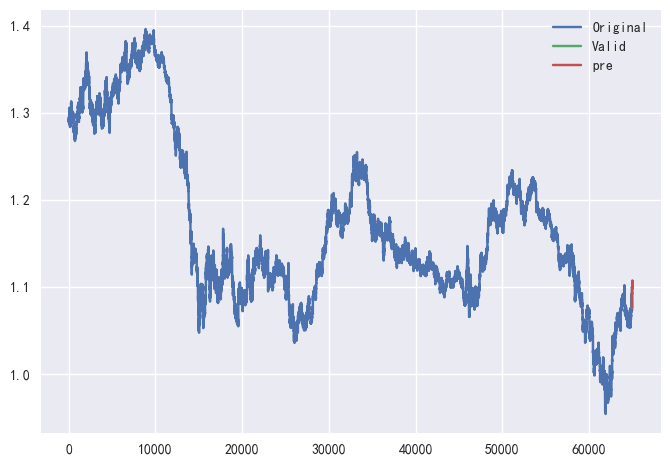

In [37]:
plt.plot(df['收盘'])
plt.plot(valid[['收盘', '预测']])
plt.legend(['Original','Valid', 'pre'])
plt.show();

In [36]:
valid=df[X.shape[0]:]
valid['预测']=forecast_set
valid.head()

C:\Users\fzh00\AppData\Local\Temp\ipykernel_10232\440417941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['预测']=forecast_set


,收盘,变化率,变化,成交量,label,预测
64950,1.0761,0.018586,-0.009292,2631,NaN,1.076444
64951,1.0759,0.074356,-0.018586,1999,NaN,1.076266
64952,1.0761,0.018586,0.018589,1039,NaN,1.076509
64953,1.0926,0.027457,0.036623,109,NaN,1.092970
64954,1.0923,0.054930,-0.018307,205,NaN,1.092672


In [35]:
# 预测
forecast_set  = clf.predict(X_late)
print(forecast_set)

[1.0764442  1.07626581 1.0765092  1.0929699  1.09267154 1.09307179
 1.09276922 1.09257266 1.09651704 1.0976971  1.09779557 1.09892682
 1.09983067 1.09964549 1.0997344  1.09914833 1.09934781 1.09945437
 1.09974956 1.09994448 1.10043005 1.09984551 1.0995472  1.09915026
 1.09924858 1.09865606 1.09834293 1.1001104  1.10159354 1.10250624
 1.10163204 1.10123306 1.1050347  1.10666893 1.10490799 1.10549373
 1.10581292 1.10551833 1.10512336 1.10492281 1.10492379 1.10482977
 1.10502545 1.10542128 1.10570805 1.10660533 1.10719655 1.10720804
 1.10711081 1.1067127 ]


In [34]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,Y_train)
# 评估准确性
clf.score(X_test,Y_test)

LinearRegression()

0.9926649033345571

In [38]:
df.shape
X.shape

(65000, 5)

(64950, 4)

In [33]:
# 分割测试集训练集
from sklearn.model_selection import train_test_split
X_late = X[-50:]
X = X[:-50]
y = np.array(df['label'])
y_late = y[-50:]
y = y[:-50]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X = np.array(df.drop('label',1))
from  sklearn import preprocessing
X = preprocessing.scale(X)
X[:3]

C:\Users\fzh00\AppData\Local\Temp\ipykernel_10232\1105143812.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop('label',1))


array([[ 1.25060698,  1.50894878, -1.65025128, -0.15436858],
       [ 1.2578836 ,  0.21815149,  0.5245119 ,  0.3137988 ],
       [ 1.27451589, -0.27854921,  1.2748069 ,  0.04881816]])

In [31]:
df['label'] = df[forecast_col].shift(-50)
df.head(10)

C:\Users\fzh00\AppData\Local\Temp\ipykernel_10232\3133035037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[forecast_col].shift(-50)


,收盘,变化率,变化,成交量,label
0,1.2890,0.186191,-0.170384,3063,1.2932
1,1.2897,0.085291,0.054306,4404,1.2944
2,1.2913,0.046465,0.131824,3645,1.2950
3,1.2911,0.092944,-0.015488,3544,1.2950
4,1.2917,0.085159,0.046472,3287,1.2984
5,1.2925,0.030948,0.061934,3246,1.2975
6,1.2921,0.092872,-0.030948,3854,1.3005
7,1.2935,0.100503,0.108351,4365,1.3000
8,1.2934,0.038658,-0.007731,4302,1.3017
9,1.2949,0.139007,0.115973,4730,1.3027


In [9]:
# 定义预测变量
forecast_col = '收盘'
# 定义预测时间
import math
forecast_out = int(math.ceil(0.01*len(df)))
forecast_out

650

In [30]:
df = data[['收盘','变化率','变化','成交量']]
df.head()

,收盘,变化率,变化,成交量
0,1.2890,0.186191,-0.170384,3063
1,1.2897,0.085291,0.054306,4404
2,1.2913,0.046465,0.131824,3645
3,1.2911,0.092944,-0.015488,3544
4,1.2917,0.085159,0.046472,3287


In [7]:
data.shape

(65000, 9)

In [6]:
data['变化率']=(data['最高']-data['收盘'])/data['收盘']*100
data['变化']=(data['收盘']-data['开盘'])/data['开盘']*100
data.head()

,日期,时间,开盘,最高,最低,收盘,成交量,变化率,变化
0,2012.10.02,08:00,1.2912,1.2914,1.2890,1.2890,3063,0.186191,-0.170384
1,2012.10.02,09:00,1.2890,1.2908,1.2880,1.2897,4404,0.085291,0.054306
2,2012.10.02,10:00,1.2896,1.2919,1.2894,1.2913,3645,0.046465,0.131824
3,2012.10.02,11:00,1.2913,1.2923,1.2903,1.2911,3544,0.092944,-0.015488
4,2012.10.02,12:00,1.2911,1.2928,1.2908,1.2917,3287,0.085159,0.046472


In [5]:
data = pd.data = pd.read_csv(r"C:\Users\fzh00\Desktop\EURUSD60.csv",names=['日期',
                                        '时间','开盘','最高','最低','收盘','成交量'])
data.head()

,日期,时间,开盘,最高,最低,收盘,成交量
0,2012.10.02,08:00,1.2912,1.2914,1.2890,1.2890,3063
1,2012.10.02,09:00,1.2890,1.2908,1.2880,1.2897,4404
2,2012.10.02,10:00,1.2896,1.2919,1.2894,1.2913,3645
3,2012.10.02,11:00,1.2913,1.2923,1.2903,1.2911,3544
4,2012.10.02,12:00,1.2911,1.2928,1.2908,1.2917,3287


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd